# Clustering de documents

## Imports

In [1]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [2]:
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
data_path = "../data/txt/"

## Choisir une décennie

In [4]:
DECADE = '1910'

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [5]:
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]

In [6]:
# Exemple de fichiers
files[:5]

['Bxl_1910_Tome_I1_Part_1.txt',
 'Bxl_1910_Tome_I1_Part_2.txt',
 'Bxl_1910_Tome_I1_Part_3.txt',
 'Bxl_1910_Tome_I1_Part_4.txt',
 'Bxl_1910_Tome_I1_Part_5.txt']

In [7]:
texts = [open(data_path + f).read() for f in files]

In [8]:
# Exemple de textes
texts[0][:400]

'\x0cV I L L E\n\nD E\n\nB R U X E L L E S .\no\n\nBULLETIN COMMUNAL\nA N N É E\n\nP R E M I È R E\n\nTOME\n\nC O M P T E\n\nR E N D U\n\n1910.\n\nP A R T I E .\n\nI.\n\nD E S\n\nS É A N C E S .\n\nB R U X E L L E S\nTYPOGRAPHIE E T LITHOGRAPHIE E . G U Y O T ,\n\nR U E P A C H E C O , 18\n\n\x0c\x0cN°l.\n\nCOMPTE RENDU D E L A SÉANCE D U 1 7 JANVIER 1 9 1 0 .\n\nVILLE\n\nDE\n\nBULLETIN\n\nBRUXELLES\n\nCOMMUNAL\n\nAnnée\n\nCONSEIL\n\n1910\n\nC O M M U N A L\n\n'

## Vectoriser les documents à l'aide de TF-IDF

In [9]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [10]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5,
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [11]:
%time tfidf_vectors = vectorizer.fit_transform(texts)

CPU times: user 1min 24s, sys: 63.5 ms, total: 1min 24s
Wall time: 1min 24s


In [12]:
# Détail de la matrice
tfidf_vectors

<170x7097 sparse matrix of type '<class 'numpy.float64'>'
	with 252381 stored elements in Compressed Sparse Row format>

### Imprimer le vecteur tf-IDF du premier document

In [13]:
pd.Series(
    tfidf_vectors[0].toarray()[0],
    index=vectorizer.get_feature_names_out()
    ).sort_values(ascending=False)

enseignant          0.194609
perfectionnement    0.160739
theodor             0.151363
l'honorable         0.140094
sacrés              0.129844
                      ...   
dit-il              0.000000
distribués          0.000000
distribuées         0.000000
distribué           0.000000
™                   0.000000
Length: 7097, dtype: float64

## Comprendre les vecteurs et leurs "distances"

In [14]:
cosine([1, 2, 3], [1, 2, 3])

0

In [15]:
cosine([1, 2, 3], [1, 2, 2])

0.02004211298777725

In [16]:
cosine([1, 2, 3], [2, 2, 2])

0.07417990022744858

### Tests sur nos documents

In [17]:
tfidf_array = tfidf_vectors.toarray()

In [18]:
# Vecteur du document 0
tfidf_array[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [19]:
# Vecteur du document 1
tfidf_array[1]

array([0.        , 0.01001937, 0.        , ..., 0.        , 0.        ,
       0.        ])

In [20]:
cosine(tfidf_array[0], tfidf_array[1])

0.712899401391456

## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

Pour en savoir plus sur le KMeans clustering :
- https://medium.com/dataseries/k-means-clustering-explained-visually-in-5-minutes-b900cc69d175

### Définir un nombre de clusters

In [21]:
N_CLUSTERS = 5

### Instancier le modèle K-Means et ses arguments

In [22]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [23]:
clusters = km_model.fit_predict(tfidf_vectors)

In [24]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [25]:
pprint(dict(clustering))

{0: ['Bxl_1910_Tome_I2_1_Part_5.txt',
     'Bxl_1910_Tome_I2_2_Part_10.txt',
     'Bxl_1910_Tome_I2_2_Part_8.txt',
     'Bxl_1910_Tome_I2_2_Part_9.txt',
     'Bxl_1911_Tome_I2_2_Part_10.txt',
     'Bxl_1911_Tome_I2_2_Part_8.txt',
     'Bxl_1911_Tome_I2_2_Part_9.txt',
     'Bxl_1912_Tome_I2_2_Part_10.txt',
     'Bxl_1912_Tome_I2_2_Part_11.txt',
     'Bxl_1912_Tome_I2_2_Part_9.txt',
     'Bxl_1913_Tome_I2_2_Part_7.txt',
     'Bxl_1913_Tome_I2_2_Part_8.txt',
     'Bxl_1913_Tome_I2_2_Part_9.txt',
     'Bxl_1919_Tome_I2_2_Part_10.txt',
     'Bxl_1919_Tome_I2_2_Part_6.txt',
     'Bxl_1919_Tome_I2_2_Part_7.txt',
     'Bxl_1919_Tome_I2_2_Part_8.txt',
     'Bxl_1919_Tome_I2_2_Part_9.txt',
     'Bxl_1919_Tome_budget_Part_2.txt',
     'Bxl_1919_Tome_budget_Part_3.txt'],
 1: ['Bxl_1910_Tome_I2_1_Part_10.txt',
     'Bxl_1910_Tome_I2_1_Part_11.txt',
     'Bxl_1910_Tome_I2_1_Part_12.txt',
     'Bxl_1910_Tome_I2_1_Part_8.txt',
     'Bxl_1910_Tome_I2_1_Part_9.txt',
     'Bxl_1910_Tome_I2_2_Part_1.txt',

## Visualiser les clusters

### Réduire les vecteurs à 2 dimensions à l'aide de l'algorithme PCA
Cette étape est nécessaire afin de visualiser les documents dans un espace 2D

https://fr.wikipedia.org/wiki/Analyse_en_composantes_principales

In [26]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

In [27]:
reduced_vectors[:10]

array([[-0.29559221,  0.02958274],
       [-0.21130401,  0.00862322],
       [-0.07379351, -0.02808611],
       [-0.31097718,  0.09738857],
       [-0.17718925,  0.04689519],
       [-0.32505237,  0.11745606],
       [-0.13381642,  0.00416635],
       [ 0.08315334, -0.0710651 ],
       [-0.23320388, -0.02375976],
       [ 0.15929465, -0.10988029]])

### Générer le plot

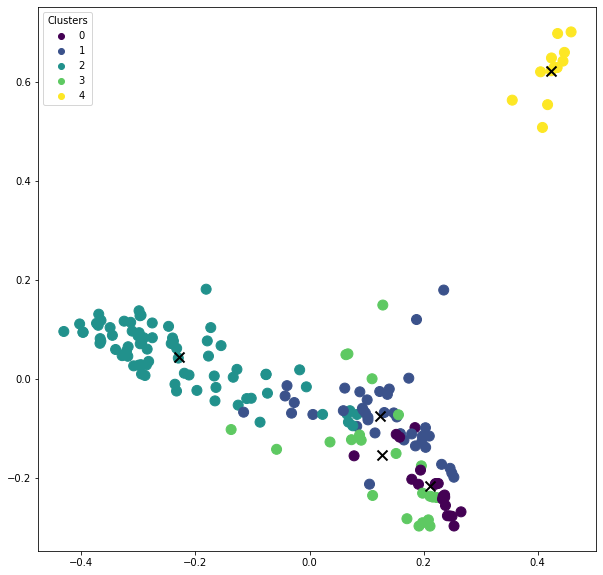

In [28]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")